<a href="https://colab.research.google.com/github/leehyeonjin99/BOOSTCAMP_AI_Tech_Study_Diary/blob/main/%ED%95%99%EC%8A%B5%EC%A0%95%EB%A6%AC/Pytorch/Additional_Study/%ED%95%A9%EC%84%B1%EA%B3%B1%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## MNIST 분류 : CNN

'''
# 1번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 2번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 3번 레이어 : 전결합층(Fully-Connected layer)
특성맵을 펼친다. # batch_size × 7 × 7 × 64 → batch_size × 3136
전결합층(뉴런 10개) + 활성화 함수 Softmax
'''

'\n# 1번 레이어 : 합성곱층(Convolutional layer)\n합성곱(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU\n맥스풀링(kernel_size=2, stride=2))\n\n# 2번 레이어 : 합성곱층(Convolutional layer)\n합성곱(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU\n맥스풀링(kernel_size=2, stride=2))\n\n# 3번 레이어 : 전결합층(Fully-Connected layer)\n특성맵을 펼친다. # batch_size × 7 × 7 × 64 → batch_size × 3136\n전결합층(뉴런 10개) + 활성화 함수 Softmax\n'

In [2]:
import torch
import torch.nn as nn

inputs=torch.Tensor(1,1,28,28)
print('텐서의 크기 : {}'.format(inputs.shape))

텐서의 크기 : torch.Size([1, 1, 28, 28])


In [3]:
conv1=nn.Conv2d(1,32,3,padding=1)
print(conv1)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [4]:
conv2=nn.Conv2d(32,64,kernel_size=3, padding=1)
print(conv2)

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [5]:
pool=nn.MaxPool2d(2)
print(pool)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [6]:
out=conv1(inputs)
print(out.shape)

torch.Size([1, 32, 28, 28])


In [7]:
out=pool(out)
print(out.shape)

torch.Size([1, 32, 14, 14])


In [8]:
out=conv2(out)
print(out.shape)

torch.Size([1, 64, 14, 14])


In [9]:
out=pool(out)
print(out.shape)

torch.Size([1, 64, 7, 7])


In [10]:
out=out.view(out.size(0),-1)
print(out.shape)

torch.Size([1, 3136])


In [11]:
fc=nn.Linear(3136,10)
out=fc(out)
print(out.shape)

torch.Size([1, 10])


In [12]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

device='cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device=='cuda':
  torch.cuda.manual_seed_all(777)

In [13]:
learning_rate=0.001
training_epochs=15
batch_size=100

In [14]:
mnist_train=dsets.MNIST(root='MNIST_data/',
                        train=True,
                        transform=transforms.ToTensor(),
                        download=True)

mnist_test=dsets.MNIST(root='MNIST_data/',
                       train=False,
                       transform=transforms.ToTensor(),
                       download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [15]:
data_loader=torch.utils.data.DataLoader(dataset=mnist_train, 
                                        batch_size=batch_size,
                                        shuffle=True,
                                        drop_last=True)

In [20]:
class CNN(torch.nn.Module):
  def __init__(self):
    super(CNN,self).__init__()

    self.layer1=torch.nn.Sequential(torch.nn.Conv2d(1,32,3,padding=1),
                                    torch.nn.ReLU(),
                                    torch.nn.MaxPool2d(2,stride=2))
    
    self.layer2=torch.nn.Sequential(torch.nn.Conv2d(32,64,3,padding=1),
                                    torch.nn.ReLU(),
                                    torch.nn.MaxPool2d(2,stride=2))
    
    self.fc=nn.Linear(7*7*64,10, bias=True)

    torch.nn.init.xavier_uniform_(self.fc.weight)

  def forward(self, x):
    out=self.layer1(x)
    out=self.layer2(out)
    out=out.view(out.size(0),-1)
    out=self.fc(out)
    return out

In [21]:
model=CNN().to(device)
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [22]:
total_batch=len(data_loader)
print('총 배치의 수 :', total_batch)

총 배치의 수 : 600


In [23]:
for epoch in range(training_epochs):
  avg_cost=0
  
  for X,Y in data_loader:
    X=X.to(device)
    Y=Y.to(device)

    hypothesis=model(X)
    cost=criterion(hypothesis,Y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost+=cost/total_batch

  print('[Epoch : {:>4}] cost = {:>.9}'.format(epoch+1, avg_cost))

[Epoch :    1] cost = 0.229049161
[Epoch :    2] cost = 0.0599579774
[Epoch :    3] cost = 0.0437662713
[Epoch :    4] cost = 0.0354061462
[Epoch :    5] cost = 0.0292362552
[Epoch :    6] cost = 0.0252276529
[Epoch :    7] cost = 0.0203707572
[Epoch :    8] cost = 0.0184220299
[Epoch :    9] cost = 0.0148624117
[Epoch :   10] cost = 0.0124477148
[Epoch :   11] cost = 0.0109220995
[Epoch :   12] cost = 0.00895306002
[Epoch :   13] cost = 0.00866267271
[Epoch :   14] cost = 0.00657186145
[Epoch :   15] cost = 0.00618735515


In [24]:
with torch.no_grad():
  X_test=mnist_test.test_data.view(len(mnist_test),1,28,28).float().to(device)
  Y_test=mnist_test.test_labels.to(device)

  prediction=model(X_test)
  correct_prediction=torch.argmax(prediction,1)==Y_test
  accuracy=correct_prediction.float().mean()
  print('Accuracy:',accuracy.item())

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9846999645233154


예측값 : 9
실제값 : 9


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


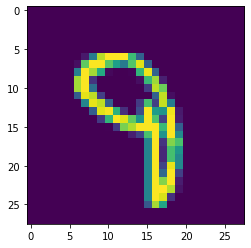

In [51]:
import matplotlib.pyplot as plt

index=193

plt.imshow(mnist_test.test_data[index])
print("예측값 :",torch.argmax(model(mnist_test.test_data[index].view(1,1,28,28).float().to(device))).item())
print('실제값 :',mnist_test.test_labels[index].item())

In [52]:
## MNIST 분류 : 깊은 CNN

'''
# 1번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 2번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 3번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 64, out_channel = 128, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2, padding=1))

# 4번 레이어 : 전결합층(Fully-Connected layer)
특성맵을 펼친다. # batch_size × 4 × 4 × 128 → batch_size × 2048
전결합층(뉴런 625개) + 활성화 함수 ReLU

# 5번 레이어 : 전결합층(Fully-Connected layer)
전결합층(뉴런 10개) + 활성화 함수 Softmax
'''

'\n# 1번 레이어 : 합성곱층(Convolutional layer)\n합성곱(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU\n맥스풀링(kernel_size=2, stride=2))\n\n# 2번 레이어 : 합성곱층(Convolutional layer)\n합성곱(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU\n맥스풀링(kernel_size=2, stride=2))\n\n# 3번 레이어 : 합성곱층(Convolutional layer)\n합성곱(in_channel = 64, out_channel = 128, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU\n맥스풀링(kernel_size=2, stride=2, padding=1))\n\n# 4번 레이어 : 전결합층(Fully-Connected layer)\n특성맵을 펼친다. # batch_size × 4 × 4 × 128 → batch_size × 2048\n전결합층(뉴런 625개) + 활성화 함수 ReLU\n\n# 5번 레이어 : 전결합층(Fully-Connected layer)\n전결합층(뉴런 10개) + 활성화 함수 Softmax\n'

In [53]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [54]:
mnist_train=dsets.MNIST(root="MNIST_data/",
                        train=True,
                        transform=transforms.ToTensor(),
                        download=True)

mnist_test=dsets.MNIST(root="MNIST_data/",
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

In [55]:
data_loader=torch.utils.data.DataLoader(dataset=mnist_train,
                                        batch_size=batch_size,
                                        shuffle=True,
                                        drop_last=True)

In [56]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.keep_prob=0.5

    self.layer1=nn.Sequential(nn.Conv2d(1,32,kernel_size=3, stride=1,padding=1),
                              nn.ReLU(),
                              nn.MaxPool2d(2,stride=2))
    
    self.layer2=nn.Sequential(nn.Conv2d(32,64,kernel_size=3, stride=1, padding=1),
                              nn.ReLU(),
                              nn.MaxPool2d(2,2))
    
    self.layer3=nn.Sequential(nn.Conv2d(64,128,kernel_size=3, stride=1, padding=1),
                              nn.ReLU(),
                              nn.MaxPool2d(2,2,padding=1))
    
    self.fc1=nn.Linear(4*4*128,625, bias=True)
    torch.nn.init.xavier_uniform(self.fc1.weight)

    self.layer4=nn.Sequential(self.fc1,
                              torch.nn.ReLU(),
                              torch.nn.Dropout(p=1-self.keep_prob))
    
    self.fc2=torch.nn.Linear(625,10, bias=True)
    torch.nn.init.xavier_uniform(self.fc2.weight)

  def forward(self, x):
    out=self.layer1(x)
    out=self.layer2(out)
    out=self.layer3(out)
    out=out.view(out.size(0),-1)
    out=self.layer4(out)
    out=self.fc2(out)
    return out

In [57]:
model=CNN().to(device)
criterion=nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

total_batch=len(data_loader)

for epoch in range(training_epochs):
  avg_cost=0

  for X, Y in data_loader:
    X=X.to(device)
    Y=Y.to(device)

    hypothesis=model(X)
    cost=criterion(hypothesis, Y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost+=cost/total_batch

  print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.


[Epoch:    1] cost = 0.193226829
[Epoch:    2] cost = 0.0520603806
[Epoch:    3] cost = 0.0371056199
[Epoch:    4] cost = 0.0304591693
[Epoch:    5] cost = 0.0252224356
[Epoch:    6] cost = 0.0209341403
[Epoch:    7] cost = 0.017724026
[Epoch:    8] cost = 0.0141388569
[Epoch:    9] cost = 0.0138937114
[Epoch:   10] cost = 0.0112668313
[Epoch:   11] cost = 0.0132401427
[Epoch:   12] cost = 0.00823978335
[Epoch:   13] cost = 0.00926987082
[Epoch:   14] cost = 0.00916241761
[Epoch:   15] cost = 0.00651932741


In [58]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.983199954032898


층을 깊게 쌓는 것이 정확도 상향을 보장하지는 않는다. 즉, 효율적으로 층을 쌓는 것이 중요하다.